### 흡연과 음주에 따른 신체신호
#### 대한민국 국민건강보험공단에서 수집한 데이터
- 흡연과 음주가 건강에 미치는 영향력

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

# https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset
sd_df = pd.read_csv('./datasets/smoking_driking_dataset_Ver01.csv')

display(sd_df)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


### Features
1 Sex - 성별  
2 age - 나이  
3 height - 키  
4 weight - 몸무게  
5 waistline - 허리둘레  
6 sight_left - 시력(좌) 1(normal), 2(abnormal)  
7 sight_right - 시력(우) 1(normal), 2(abnormal)  
8 hear_left - 청력(좌)  
9 hear_right - 청력(우)  
10 SBP - 수축기 혈압  
11 DBP - 이완기 혈압  
12 BLDS - 공복혈당  
13 tot_chole - 총 콜레스테롤  
14 HDL_chole - HDL 콜레스테롤  
15 LDL_chole - LDL 콜레스테롤  
16 triglyceride - 중성지방  
17 hemoglobin - 헤모글로빈  
18 urine_protein - 요단백 또는 단백뇨  
19 serum_creatinine - 혈청 크레아티닌  
20 SGOT_AST - 혈청지오티 AST  
21 SGOT_ALT - 혈청지오티 ALT  
22 gamma_GTP - 감마지티피  
23 SMK_stat_type_cd - 흡연상태 (1 = 비흡연자, 2 = 금연, 3 = 흡연)  
24 DRK_YN - 음주여부

### 데이터 전처리
- 결측치 확인 (결측치 없음)
- 복잡한 이름의 feature명 변경
- 사용하지 않을 feature 삭제

In [2]:
# 결측치 없음
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [3]:
# feature 명 변경
sd_df.rename(columns={'SMK_stat_type_cd': 'smoking', 'DRK_YN': 'drinking'}, inplace=True)
sd_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking,drinking
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [4]:
# 사용하지 않을 feature 제거
sd_df = sd_df.drop(['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein', 'serum_creatinine'], axis=1)

In [5]:
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sex           991346 non-null  object 
 1   age           991346 non-null  int64  
 2   height        991346 non-null  int64  
 3   weight        991346 non-null  int64  
 4   SBP           991346 non-null  float64
 5   DBP           991346 non-null  float64
 6   BLDS          991346 non-null  float64
 7   tot_chole     991346 non-null  float64
 8   HDL_chole     991346 non-null  float64
 9   LDL_chole     991346 non-null  float64
 10  triglyceride  991346 non-null  float64
 11  hemoglobin    991346 non-null  float64
 12  SGOT_AST      991346 non-null  float64
 13  SGOT_ALT      991346 non-null  float64
 14  gamma_GTP     991346 non-null  float64
 15  smoking       991346 non-null  float64
 16  drinking      991346 non-null  object 
dtypes: float64(12), int64(3), object(2)
memory usage

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
# 음주
drinking_y = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'Y')]
drinking_n = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N')]
# 성별 별 음주
drinking_y_m = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'Y') & (sd_df['sex'] == 'Male')]
drinking_y_f = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'Y') & (sd_df['sex'] == 'Female')]
drinking_n_m = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N') & (sd_df['sex'] == 'Male')]
drinking_n_f = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N') & (sd_df['sex'] == 'Female')]

# 흡연
smoking_y = sd_df[(sd_df['smoking'] == 3) & (sd_df['drinking'] == 'N')]
smoking_n = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N')]
# 성별 별 흡연
smoking_y_m = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'Y') & (sd_df['sex'] == 'Male')]
smoking_y_f = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'Y') & (sd_df['sex'] == 'Female')]
smoking_n_m = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N') & (sd_df['sex'] == 'Male')]
smoking_n_f = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N') & (sd_df['sex'] == 'Female')]

# 둘 다
sd_y = sd_df[(sd_df['smoking'] == 3) & (sd_df['drinking'] == 'Y')]
sd_n = sd_df[(sd_df['smoking'] == 1) & (sd_df['drinking'] == 'N')]

### 음주 및 흡연의 성비

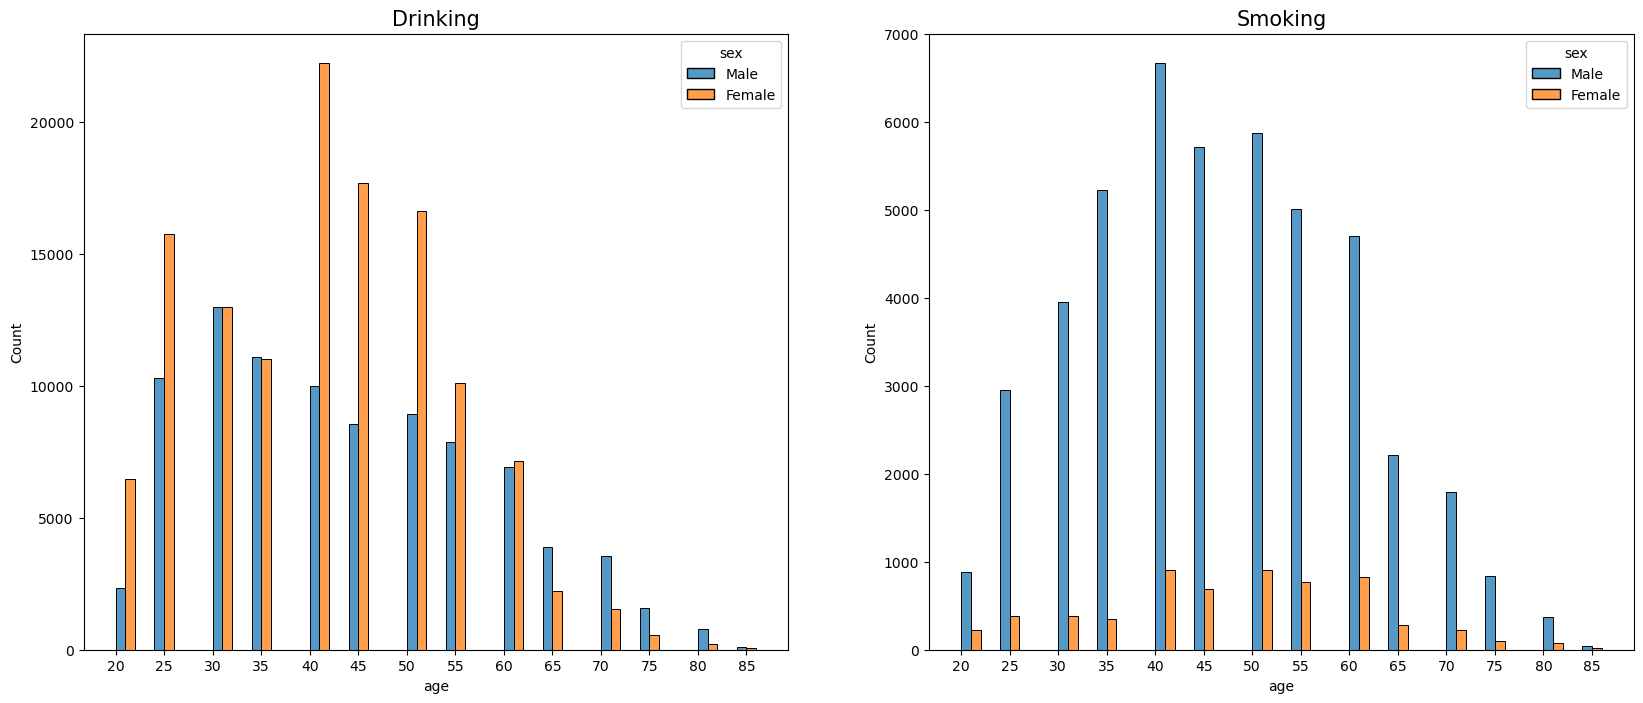

In [8]:
# 술을 마시는 사람들의 각 나이별 성별(좌), 흡연하는 사람들의 각 나이별 성별(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(ax=axes[0], x='age', data=drinking_y, hue='sex', multiple='dodge', binwidth=2)

axes[0].set_title('Drinking', fontsize=15)

sns.histplot(ax=axes[1], x='age', data=smoking_y, hue='sex', multiple='dodge', binwidth=2)

axes[1].set_title('Smoking', fontsize=15)

axes[0].set_xticks(range(20, sd_df['age'].max()+1, 5))
axes[1].set_xticks(range(20, sd_df['age'].max()+1, 5))
plt.show()

#### 흡연과 음주를 모두 하는 사람의 성비

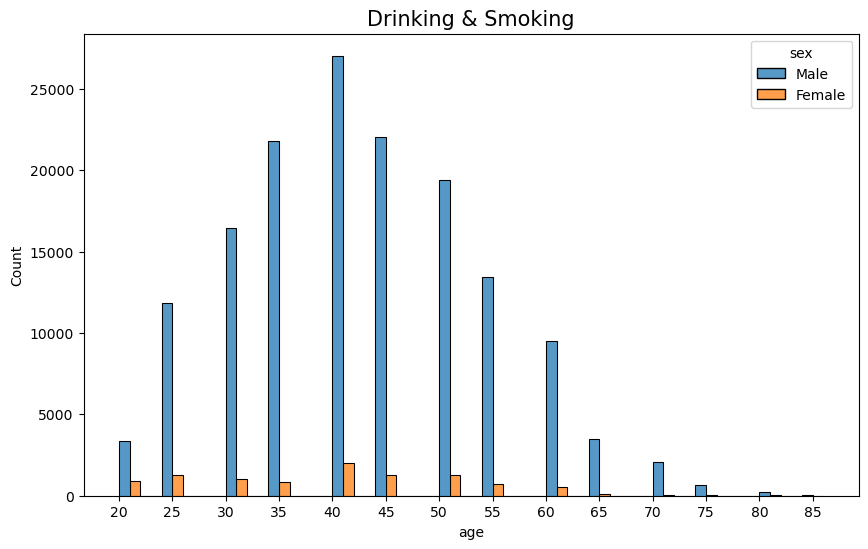

In [9]:
# 흡연과 음주를 모두 하는 사람들의 각 나이별 성별
plt.figure(figsize=(10, 6))

sns.histplot(x='age', data=sd_y, hue='sex', multiple='dodge', binwidth=2).set_title('Drinking & Smoking', fontsize=15)

plt.xticks(range(20, sd_df['age'].max()+1, 5))

plt.show()

### 성별 별 흡연과 음주
- 술만 마시는 사람의 비율이 여성이 더 높다는 것을 알 수 있으며, 40대의 음주량이 굉장히 높습니다.
- 흡연만 하는 사람은 남성이 비율이 압도적이게 높으며, 음주와 마찬가지로 40대의 흡연율이 가장 높다는 것을 알 수 있습니다.  
- 음주와 흡연을 둘다 하는 경우엔 남성의 흡연율이 너무 높은 탓에 남성의 비율이 엄청나게 높다는 것을 알 수 있습니다.
>흡연율이 높은 이유는 주로 주변 환경에 영향을 받아 흡연을 시작하는 경우가 많은데  
경기침체, 실업률 증가, 스트레스를 많이 받는 경우가 증가함에 따라 흡연율이 올라가서 점점 퍼져나가 더 많은 사람이 흡연하게 된다고 합니다.   (http://www.gysarang.com/Module/News/Lecture.asp?MODE=V&SRNO=4446)  
>여성의 음주율이 높은 것은 도수가 낮은 술이나 과실주 등의 접근성이 높아지고 사회·문화적 수용도가 높아진 영향이라고 합니다.  
(https://m.dongascience.com/news.php?idx=62222)

### 흡연과 음주에 따른 키, 몸무게의 변화

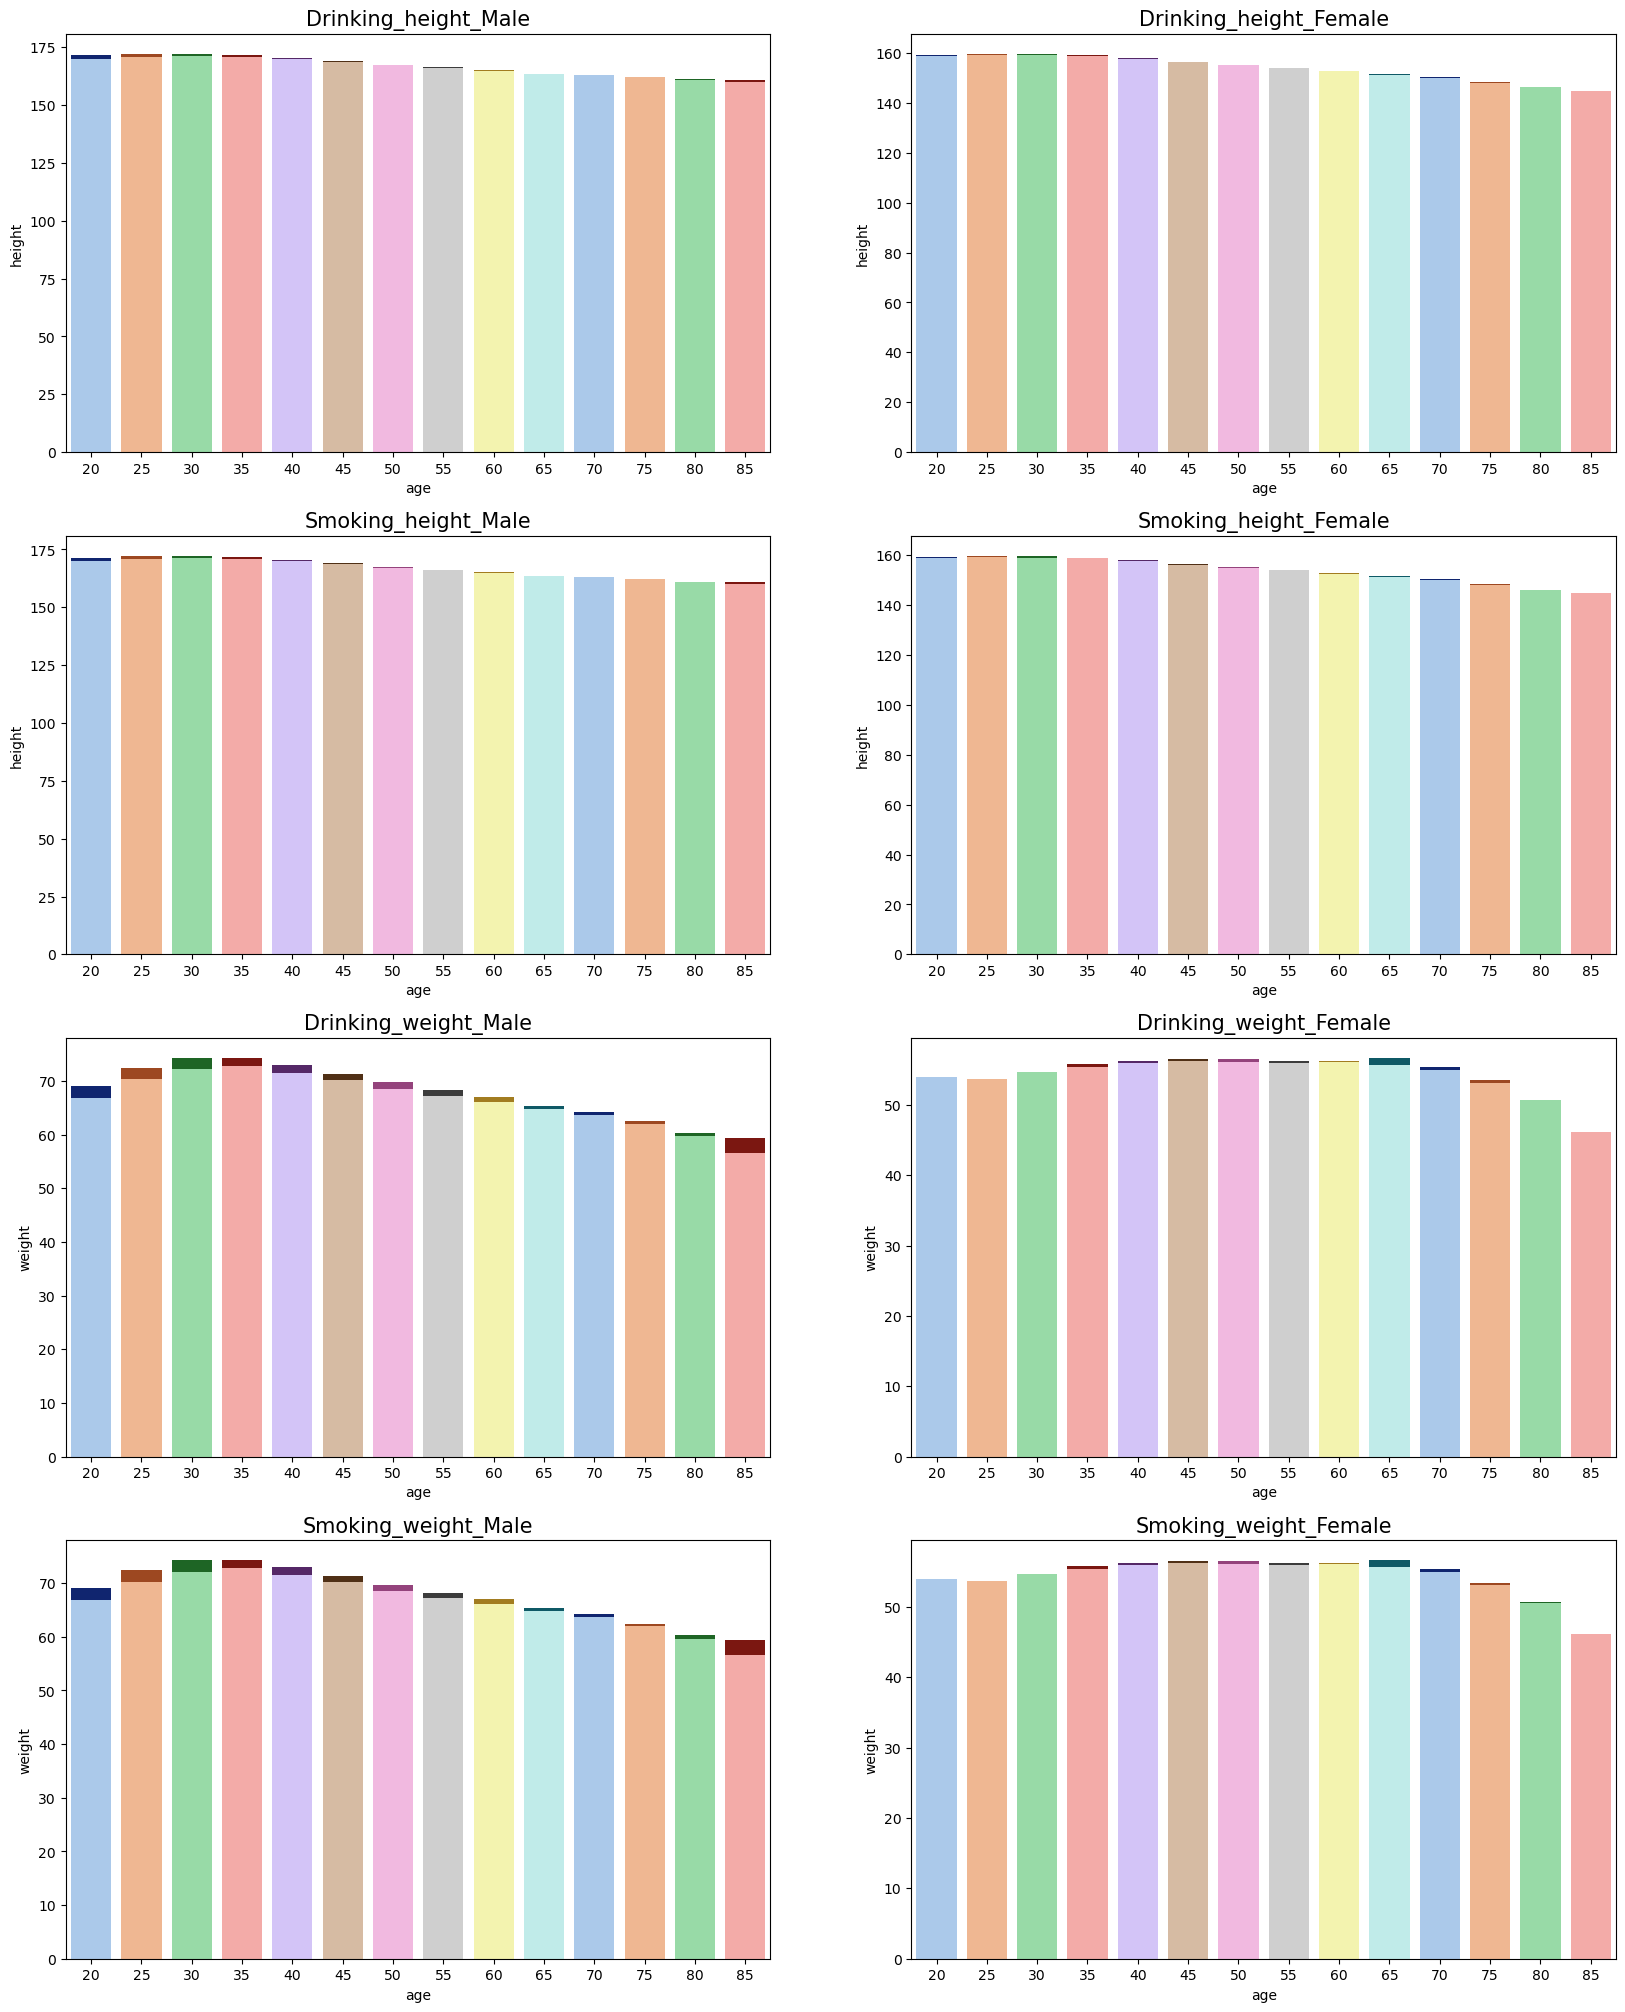

In [10]:
# 음주자와 흡연자의 각 나이와 성별 별 몸무게 (음주자(좌), 흡연자(우))
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

sns.barplot(ax=axes[0, 0], x='age',y='height', data=drinking_y_m, errorbar=None, palette='dark')
sns.barplot(ax=axes[0, 0], x='age',y='height', data=drinking_n_m, errorbar=None, palette='pastel')
axes[0, 0].set_title('Drinking_height_Male', fontsize=15)

sns.barplot(ax=axes[0, 1], x='age',y='height', data=drinking_y_f, errorbar=None, palette='dark')
sns.barplot(ax=axes[0, 1], x='age',y='height', data=drinking_n_f, errorbar=None, palette='pastel')
axes[0, 1].set_title('Drinking_height_Female', fontsize=15)

sns.barplot(ax=axes[1, 0], x='age',y='height', data=smoking_y_m, errorbar=None, palette='dark')
sns.barplot(ax=axes[1, 0], x='age',y='height', data=smoking_n_m, errorbar=None, palette='pastel')
axes[1, 0].set_title('Smoking_height_Male', fontsize=15)

sns.barplot(ax=axes[1, 1], x='age',y='height', data=smoking_y_f, errorbar=None, palette='dark')
sns.barplot(ax=axes[1, 1], x='age',y='height', data=smoking_n_f, errorbar=None, palette='pastel')
axes[1, 1].set_title('Smoking_height_Female', fontsize=15)

sns.barplot(ax=axes[2, 0], x='age',y='weight', data=drinking_y_m, errorbar=None, palette='dark')
sns.barplot(ax=axes[2, 0], x='age',y='weight', data=drinking_n_m, errorbar=None, palette='pastel')
axes[2, 0].set_title('Drinking_weight_Male', fontsize=15)

sns.barplot(ax=axes[2, 1], x='age',y='weight', data=drinking_y_f, errorbar=None, palette='dark')
sns.barplot(ax=axes[2, 1], x='age',y='weight', data=drinking_n_f, errorbar=None, palette='pastel')
axes[2, 1].set_title('Drinking_weight_Female', fontsize=15)

sns.barplot(ax=axes[3, 0], x='age',y='weight', data=smoking_y_m, errorbar=None, palette='dark')
sns.barplot(ax=axes[3, 0], x='age',y='weight', data=smoking_n_m, errorbar=None, palette='pastel')
axes[3, 0].set_title('Smoking_weight_Male', fontsize=15)

sns.barplot(ax=axes[3, 1], x='age',y='weight', data=smoking_y_f, errorbar=None, palette='dark')
sns.barplot(ax=axes[3, 1], x='age',y='weight', data=smoking_n_f, errorbar=None, palette='pastel')
axes[3, 1].set_title('Smoking_weight_Female', fontsize=15)

plt.show()

#### 음주와 흡연에 따른 키, 몸무게 변화
- 음주 및 흡연자들의 키에는 거의 차이가 없었으며,
- 남성 음주자들의 몸무개에 정말 작은 차이가 있는 것을 볼 수 있다.

### 혈관 및 혈액

#### 혈압
- 혈압이란 혈액이 동맥벽에 가하는 압력을 나타내는 것으로,  
일반적으로 수축기 혈압(Systolic Blood Pressure, SBP)과 이완기 혈압(Diastolic Blood Pressure, DBP) 두 가지로 측정됩니다.  
- 수축기 혈압(심장이 수축할 때의 혈압, 혈압이 최고로 올라가는 순간), 이완기 혈압(심장이 이완할 때의 혈압)
> 적정 혈압 - 120/80mm/Hg 이하  
> 고혈압 - 140/90mm/Hg 이상  
> 저혈압 - 90/60mm/Hg 미만

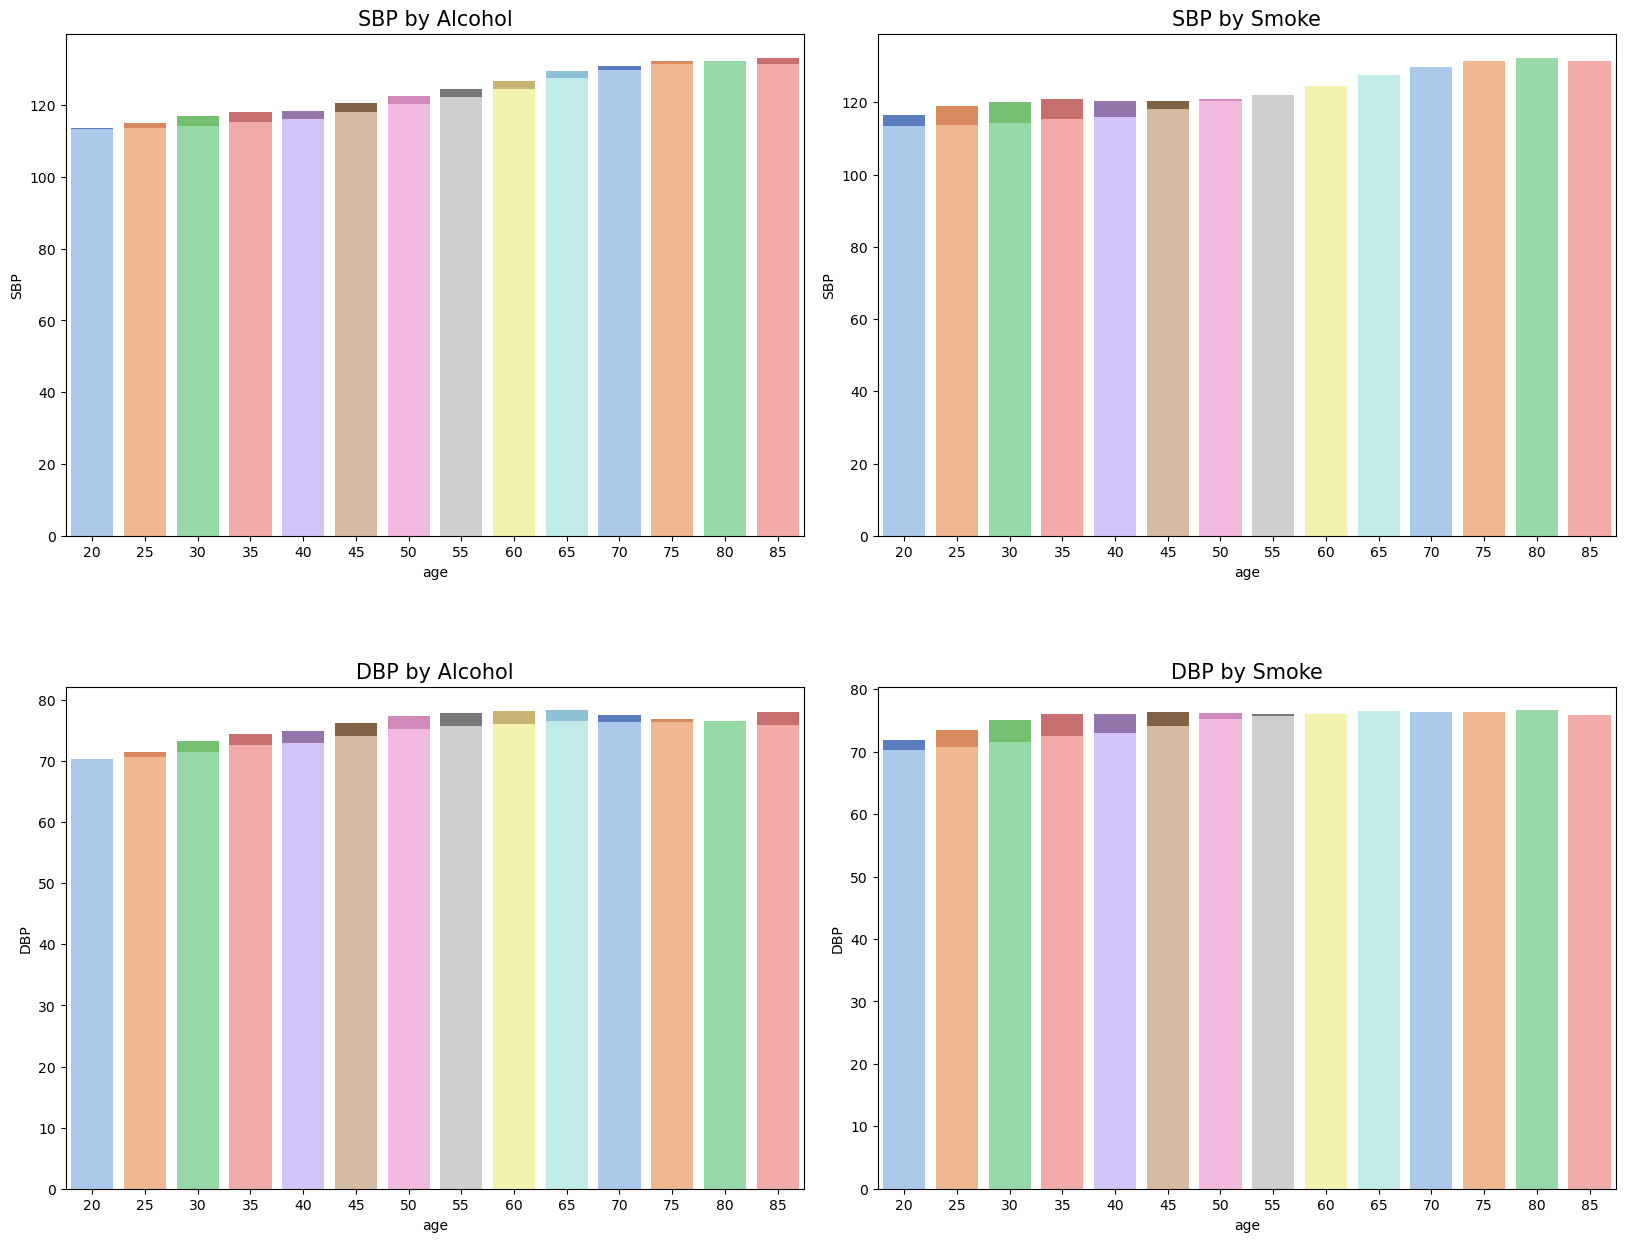

In [11]:
# 음주자의 수축기 혈압(좌), 흡연자의 수축기 혈압(우)
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.barplot(ax=axes[0, 0], x='age', y='SBP', data=drinking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[0, 0], x='age', y='SBP', data=drinking_n, palette='pastel', errorbar=None)
axes[0, 0].set_title('SBP by Alcohol', fontsize=15)

sns.barplot(ax=axes[0, 1], x='age', y='SBP', data=smoking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[0, 1], x='age', y='SBP', data=smoking_n, palette='pastel', errorbar=None)
axes[0, 1].set_title('SBP by Smoke', fontsize=15)

# 음주자의 이완기 혈압(좌), 흡연자의 이완기 혈압(우)
sns.barplot(ax=axes[1, 0], x='age', y='DBP', data=drinking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[1, 0], x='age', y='DBP', data=drinking_n, palette='pastel', errorbar=None)
axes[1, 0].set_title('DBP by Alcohol', fontsize=15)

sns.barplot(ax=axes[1, 1], x='age', y='DBP', data=smoking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[1, 1], x='age', y='DBP', data=smoking_n, palette='pastel', errorbar=None)
axes[1, 1].set_title('DBP by Smoke', fontsize=15)

plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.show()

#### 혈압
- 음주만 하는 경우 혈압이 크게 상승하지 않았지만 30대부터 60대까지 계속 올라가는 것을 확인할 수 있으며,  
흡연만 하는 경우에는 상대적으로 차이가 크지만 음주와 다르게 20대부터 40대까지 혈압이 상승하는 것을 볼 수 있다.  

### 공복혈당
- 공복혈당은 식사를 하지 않고 공복 상태에서 측정한 혈당 수치를 말합니다.  
- 만성적으로 높은 혈당은 당뇨병의 주요 증상이며, 심혈관 질환, 신장 질환등의 문제를 초래할 수 있다.
> 적정 공복 혈당 수치 - 100mg/dL 이하

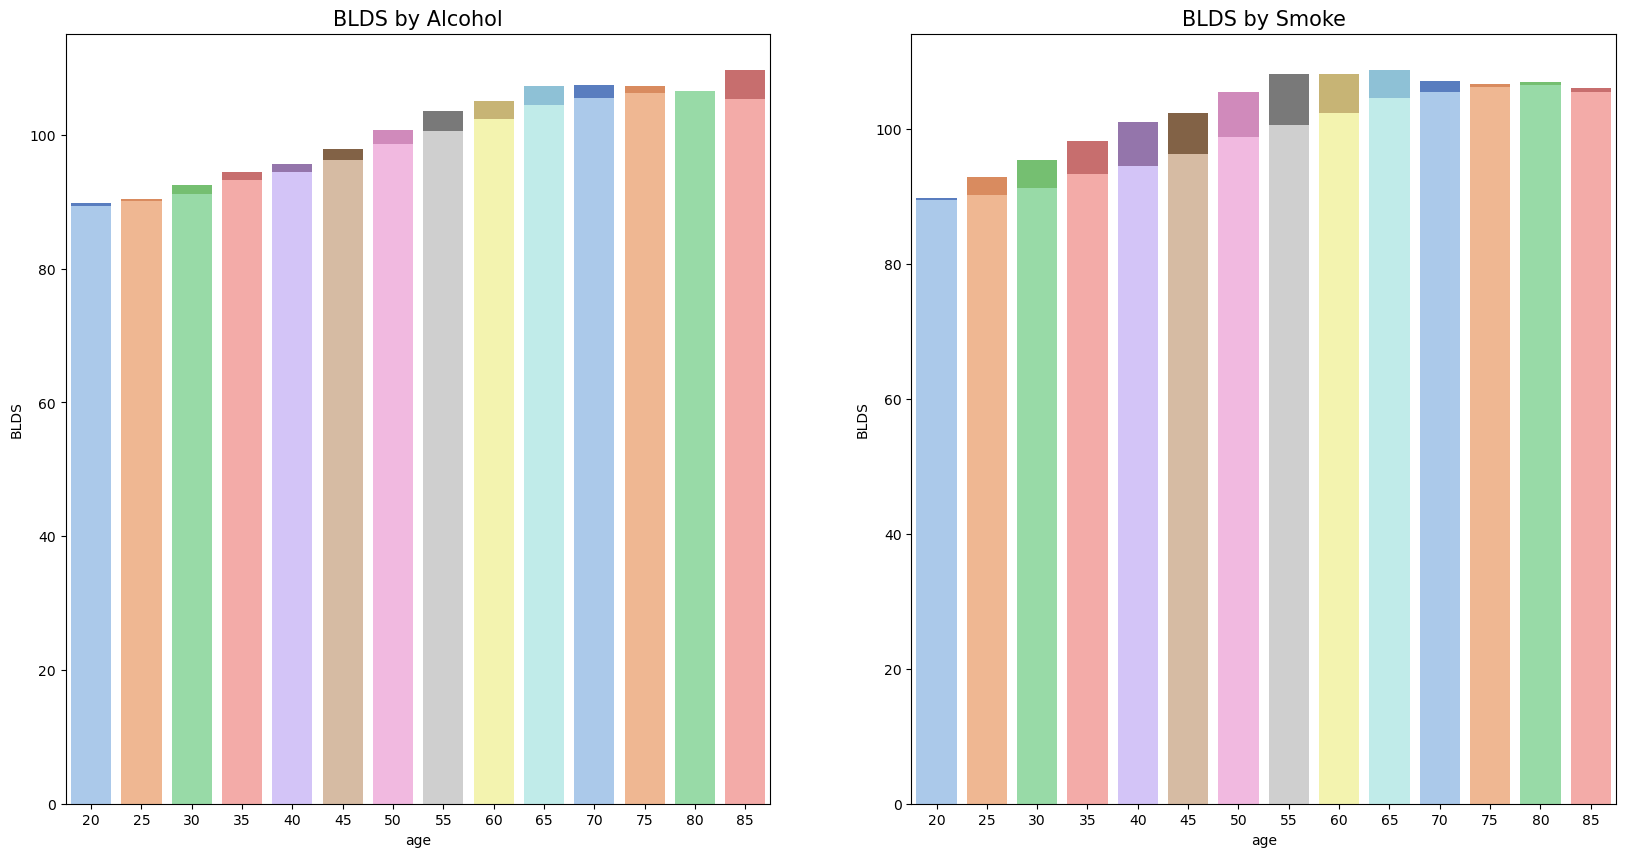

In [12]:
# 음주자의 공복혈당(좌), 흡연자의 공복형당(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=axes[0], x='age', y='BLDS', data=drinking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='BLDS', data=drinking_n, palette='pastel', errorbar=None)
axes[0].set_title('BLDS by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='BLDS', data=smoking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='BLDS', data=smoking_n, palette='pastel', errorbar=None)
axes[1].set_title('BLDS by Smoke', fontsize=15)
plt.show()

#### 공복혈당

- 음주만 하는 경우엔 30대부터 70대까지의 혈당이 상대적으로 조금 상승하지만 특이하게 80대 이후 갑자기 크게 증가하는 것을 볼 수 있습니다.  
- 흡연만 하는 경우 30대부터 60대의 비흡연자들과의 차이가 굉장히 크다는 것을 알 수 있습니다.  

### 콜레스테롤 및 중성지방
- 중성지방과 콜레스테롤은 모두 혈중 지방 수치를 나타내는 지표이며, 심혈관 질환 발생 위험과 관련이 있습니다.  
그러나 중성지방과 콜레스테롤은 서로 다른 종류의 지방성 물질이며 다른 기능을 합니다.
> 적정 콜레스테롤 - 200mg/dL 이하  
> 적정 중성지방 - 150mg/dL 이하

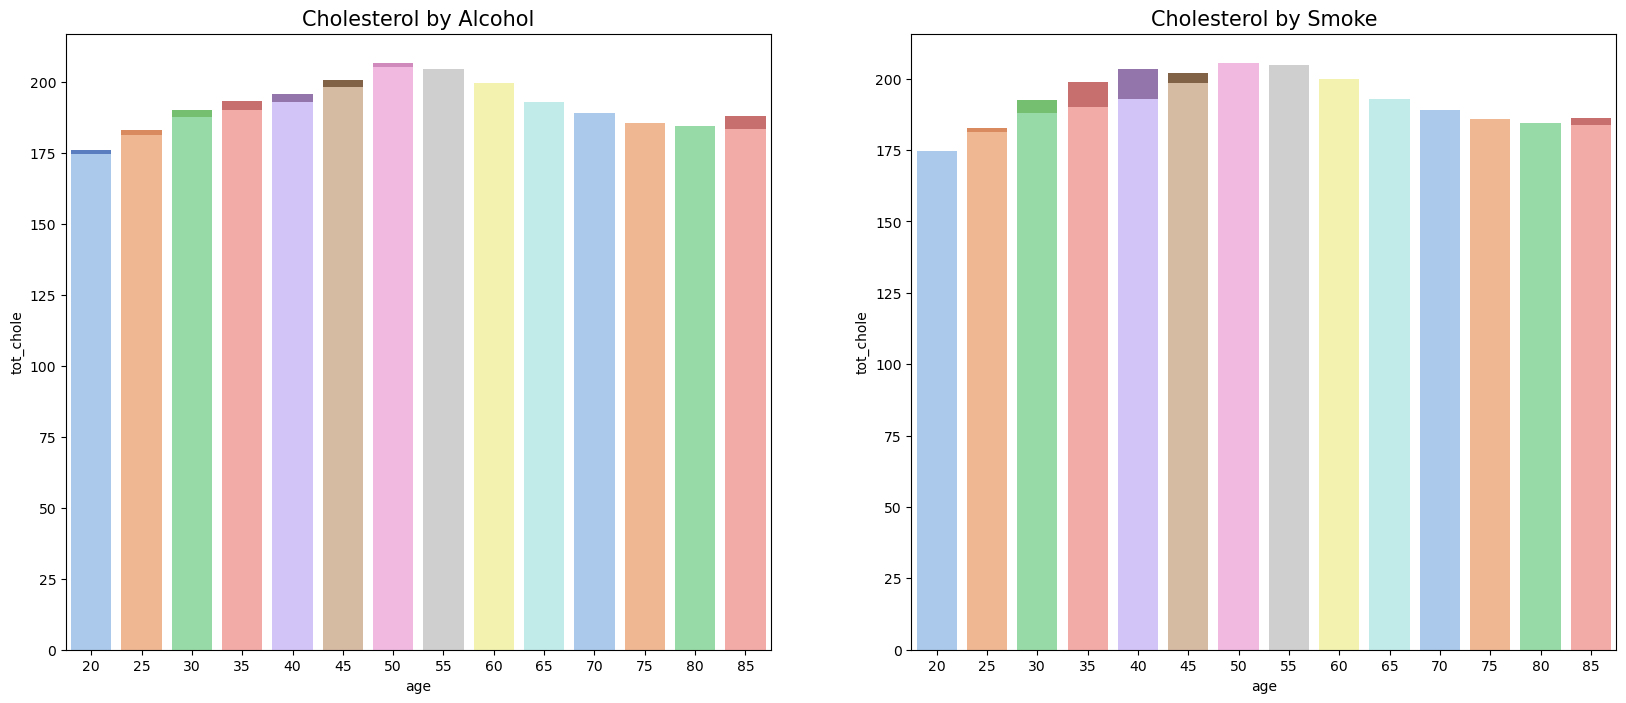

In [13]:
# 음주자의 콜레스테롤(좌), 흡연자의 콜레스테롤(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='tot_chole', data=drinking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='tot_chole', data=drinking_n, palette='pastel', errorbar=None)
axes[0].set_title('Cholesterol by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='tot_chole', data=smoking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='tot_chole', data=smoking_n, palette='pastel', errorbar=None)
axes[1].set_title('Cholesterol by Smoke', fontsize=15)
plt.show()

#### 콜레스테롤
- 음주자와 흡연자 모두 30대에서 40대의 총 콜레스테롤 지수가 조금 높은 것을 볼 수 있지만, 큰 차이가 없는 모습이다.

#### 중성지방

- 몸의 에너지원으로 사용되고, 사용되지 않은 중성지방은 체네에 저장됩니다.

> 정상 수치: 150 mg/dL 미만  
> 경계 수치: 150-199 mg/dL  
> 높은 수치: 200-499 mg/dL  
> 매우 높은 수치: 500 mg/dL 이상

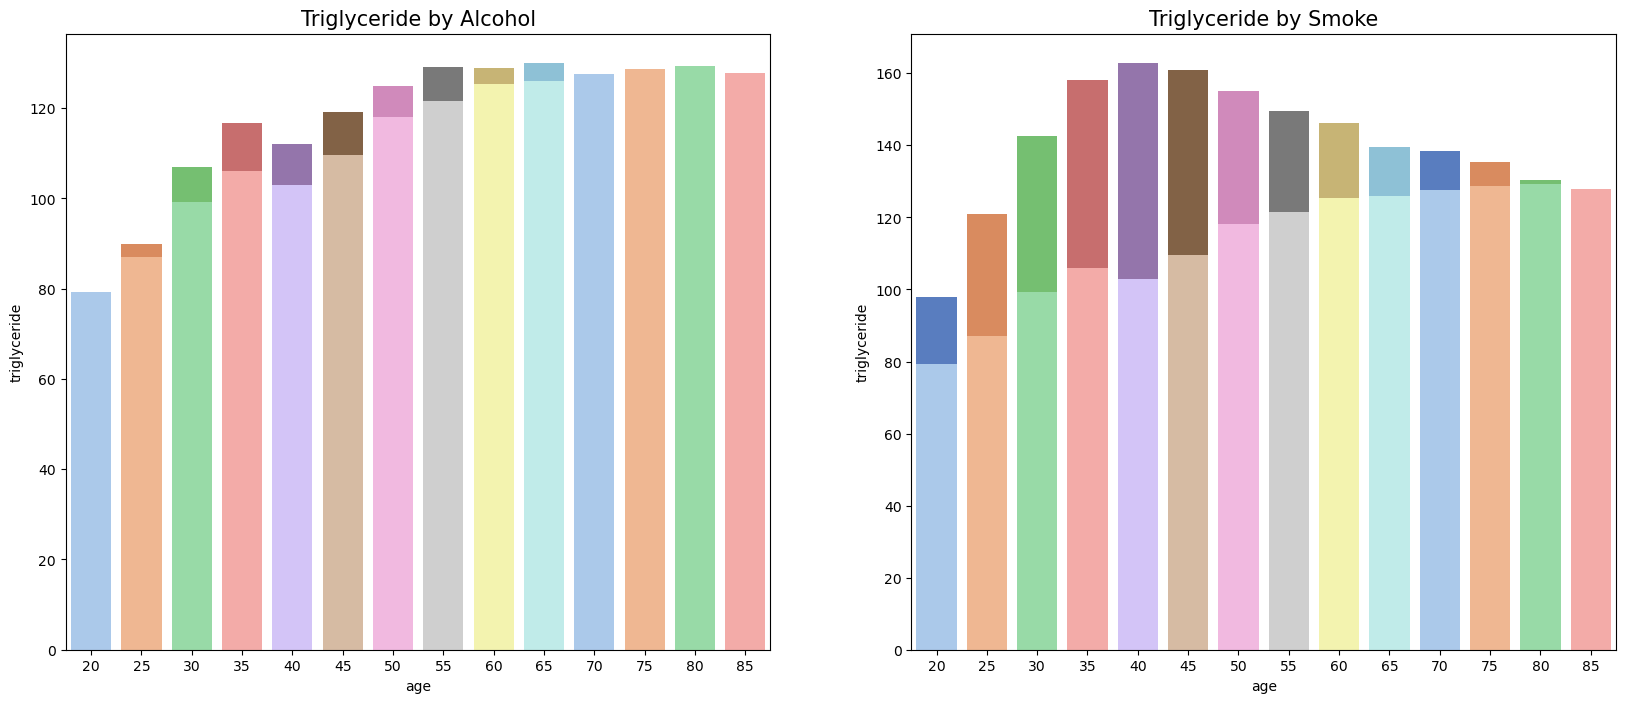

In [14]:
# 음주자의 중성지방(좌), 흡연자의 중성지방(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='triglyceride', data=drinking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='triglyceride', data=drinking_n, palette='pastel', errorbar=None)
axes[0].set_title('Triglyceride by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='triglyceride', data=smoking_y, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='triglyceride', data=smoking_n, palette='pastel', errorbar=None)
axes[1].set_title('Triglyceride by Smoke', fontsize=15)
plt.show()

#### 중성지방
- 음주만 하는 경우 20대 중반부터 60대까지의 중성지방이 조금 높다는 것을 알 수 있다.
- 흡연만 하는 경우 20대부터 70대까지의 중성지방이 굉장히 높아졌으며, 특히 30대와 40대의 중성지방이 굉장히 높다는 것을 알 수 있습니다.

### 헤모글로빈
- 헤모글로빈은 적혈구 내에서 산소와 이산화탄소를 운반하는 단백질입니다.  
- 헤모글로빈 수치가 낮을 경우 빈혈의 가능성이 있으며, 과다일 경우에는 다른 종류의 건강 문제가 발생할 수 있습니다.
> 성인 남성 평균 13.81 ~ 17.2g/dL  
> 성인 여성 평균 12.1 ~ 15.1g/dL  

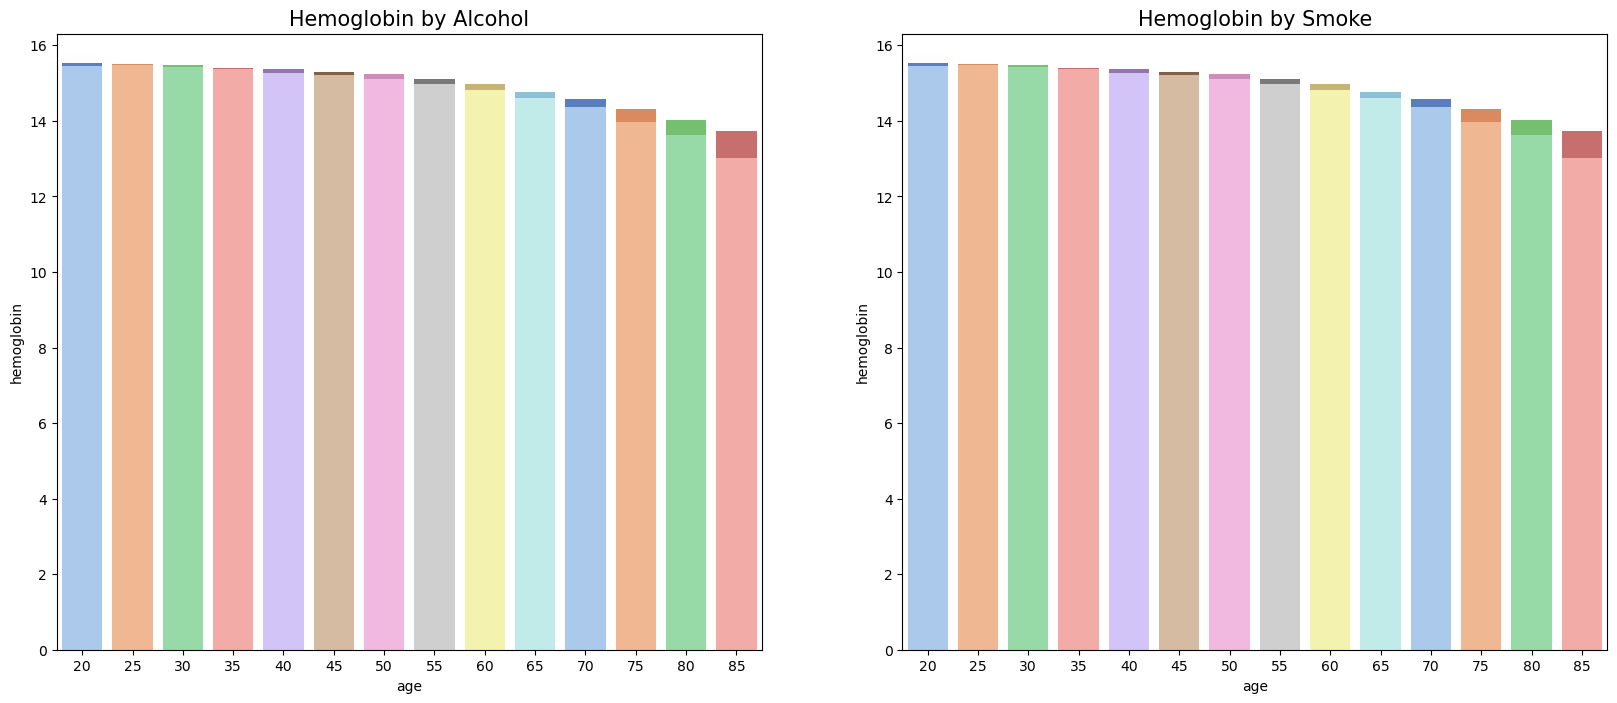

In [15]:
# 남성, 음주자의 헤모글로빈(좌), 흡연자의 헤모글로빈(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='hemoglobin', data=drinking_y_m, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='hemoglobin', data=drinking_n_m, palette='pastel', errorbar=None)
axes[0].set_title('Hemoglobin by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='hemoglobin', data=smoking_y_m, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='hemoglobin', data=smoking_n_m, palette='pastel', errorbar=None)
axes[1].set_title('Hemoglobin by Smoke', fontsize=15)
plt.show()

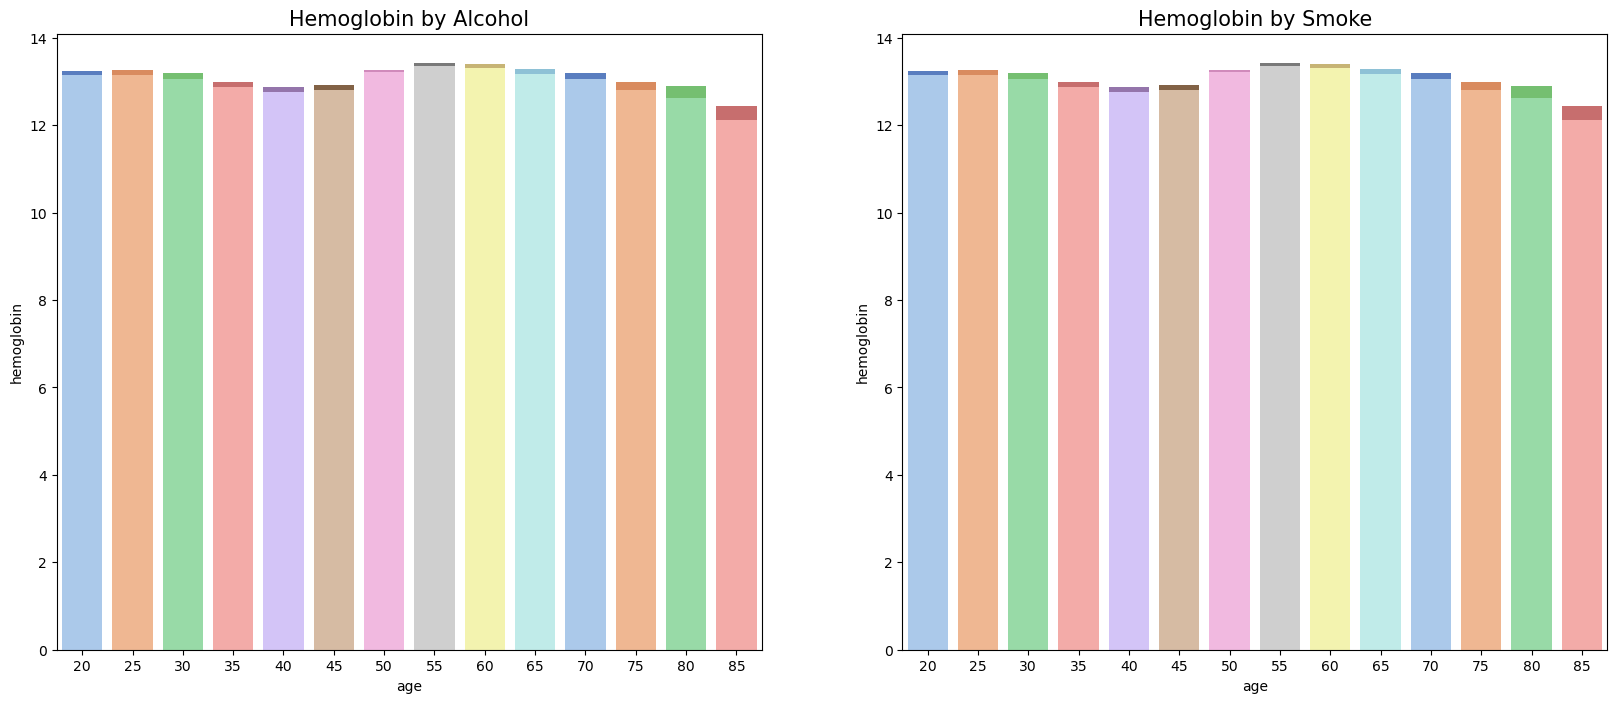

In [16]:
# 여성, 음주자의 헤모글로빈(좌), 흡연자의 헤모글로빈(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='hemoglobin', data=drinking_y_f, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='hemoglobin', data=drinking_n_f, palette='pastel', errorbar=None)
axes[0].set_title('Hemoglobin by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='hemoglobin', data=smoking_y_f, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='hemoglobin', data=smoking_n_f, palette='pastel', errorbar=None)
axes[1].set_title('Hemoglobin by Smoke', fontsize=15)
plt.show()

#### 헤모글로빈
- 남성과 여성 음주자와 흡연자 모두 수치의 큰 차이가 없긴하나, 나이가 들수록 점점 더 높아지는 모습을 볼 수 있다.

### 간 수치

#### 감마 GTP
- 감마 지티피는 간 및 다른 조직에서 발현되는 효소입니다.  
주로 간에서 생성되며, 간세포의 손상이나 간 기능 이상을 감지하는 데 사용됩니다.
> 남성 정상수치 - 9 ~ 48U/L  
> 여성 정상수치 - 7 ~ 32U/L

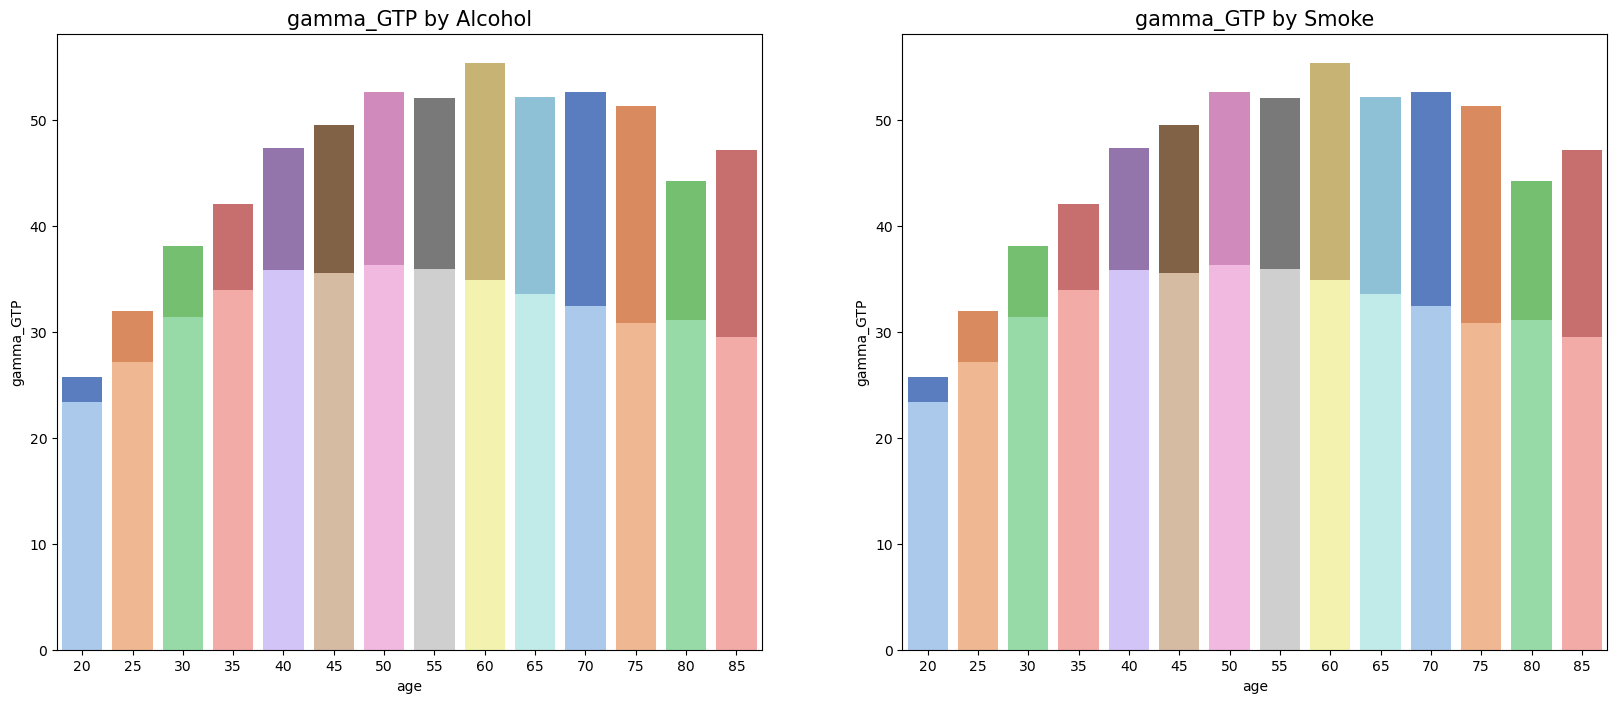

In [17]:
# 남성 음주자의 감마 지티피(좌), 흡연자의 감마 지티피(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='gamma_GTP', data=drinking_y_m, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='gamma_GTP', data=drinking_n_m, palette='pastel', errorbar=None)
axes[0].set_title('gamma_GTP by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='gamma_GTP', data=smoking_y_m, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='gamma_GTP', data=smoking_n_m, palette='pastel', errorbar=None)
axes[1].set_title('gamma_GTP by Smoke', fontsize=15)
plt.show()

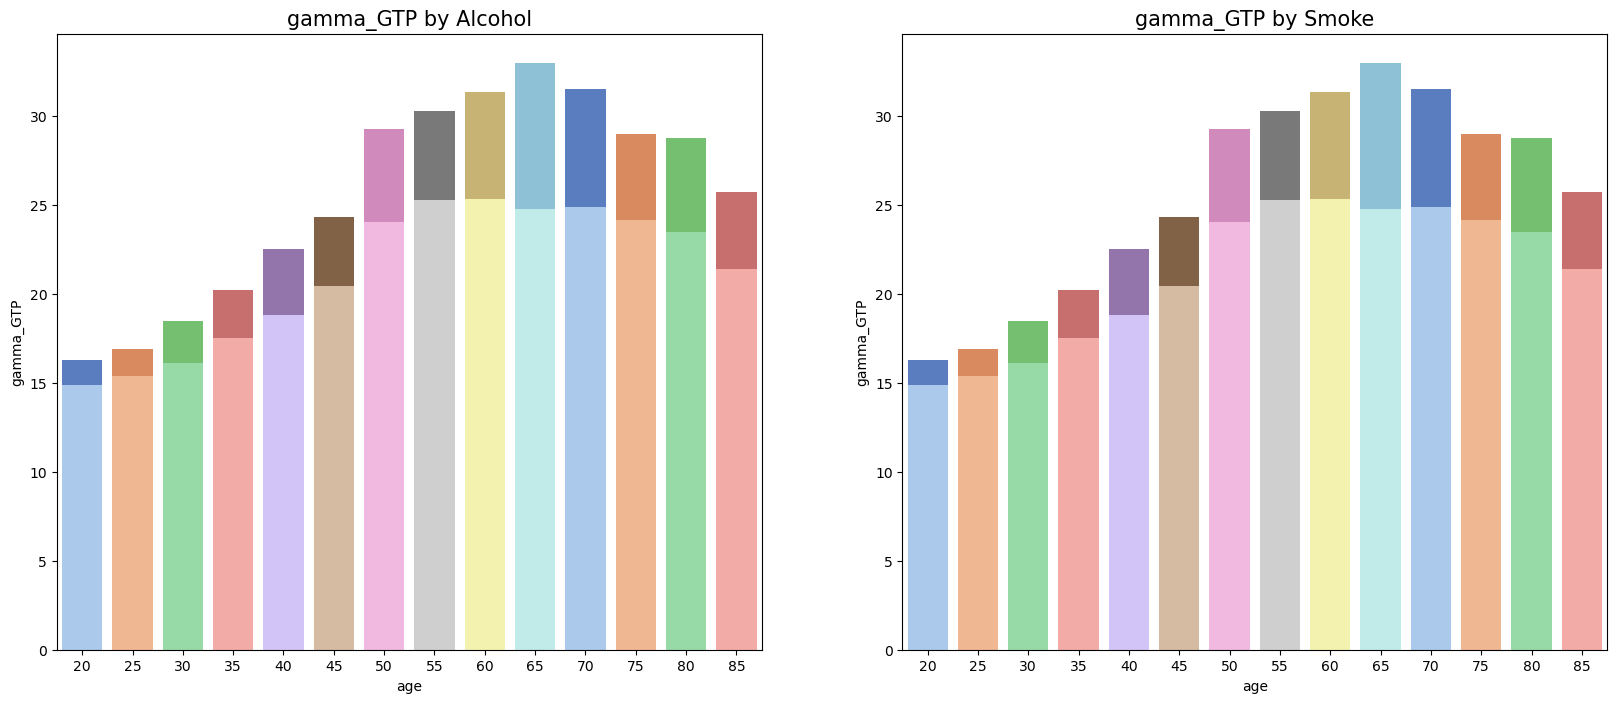

In [18]:
# 여성 음주자의 감마 지티피(좌), 흡연자의 감마 지티피(우)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='age', y='gamma_GTP', data=drinking_y_f, palette='muted', errorbar=None)
sns.barplot(ax=axes[0], x='age', y='gamma_GTP', data=drinking_n_f, palette='pastel', errorbar=None)
axes[0].set_title('gamma_GTP by Alcohol', fontsize=15)

sns.barplot(ax=axes[1], x='age', y='gamma_GTP', data=smoking_y_f, palette='muted', errorbar=None)
sns.barplot(ax=axes[1], x='age', y='gamma_GTP', data=smoking_n_f, palette='pastel', errorbar=None)
axes[1].set_title('gamma_GTP by Smoke', fontsize=15)
plt.show()

#### Gamma GTP
- 남성의 경우 흡연자와 음주자의 수치가 굉장히 비슷한 양상을 보이고 있으며, 일반인에 비해 굉장히 높은 모습을 보입니다.
- 여성의 경우엔 남성보단 낮지만, 그럼에도 꽤나 높아지는 모습을 보입니다.

#### 분석 총 정리
- 키와 몸무게엔 큰 관계가 없다.
- 혈압은 20대에서 60대까지 조금 상승하며,
- 혈당은 음주자보다 흡연자가 조금 더 높다.
- 콜레스테롤은 30대와 40대가 조금 높지만 큰 차이가 없다.
- 중성지방은 음주자도 조금 높아졌으며, 흡연자는 굉장히 높아졌다.
- 헤모글로빈수치에서는 큰 차이가 없었으며,
- 감마 GTP는 남성 음주자와 흡연자 모두 엄청나게 높아졌으며, 여성은 남성에 비해 상대적이게 낮지만 그럼에도 굉장히 높습니다.

#### 분석 결과
- 별로 차이가 없긴하지만, 전체적이게 음주보단 흡연이 더 안좋게 나왔으며, 특히 흡연자의 혈당이 조금 높고 중성지방이 상당히 높게 나왔으며,  
음주자와 흡연자 모두 일반인에 비해 간수치가 엄청나게 높아졌다.
- 따라서 흡연과 음주는 특히 혈관과 간에 정말 치명적인 손상이 가기 때문에, 혈관 및 간 건강 관리에 유의해야 할 것 입니다.